In [50]:
# Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [51]:
# Read the datafiles
cityDataDf = pd.read_csv(os.path.join("raw_data","city_data.csv"))
rideDataDf = pd.read_csv(os.path.join("raw_data","ride_data.csv"))
cityDataDf


,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban
5,South Josephville,4,Urban
6,West Sydneyhaven,70,Urban
7,Travisville,37,Urban
8,Torresshire,70,Urban
9,Lisaville,66,Urban


In [54]:
# Create your summary dataframes/data

#Summarize the ride_data
sumRideDataDf = rideDataDf.groupby(['city']).agg({'fare':['sum'],'city':['count']})
sumRideDataDf.reset_index(inplace = True)
sumRideDataDf.columns=[''.join(col) for col in sumRideDataDf.columns]
pd.DataFrame(sumRideDataDf.to_records())
sumRideDataDf = sumRideDataDf.rename(columns = {'faresum': 'Total Fare Amt','citycount': 'Num Rides' })
sumRideDataDf

#Create a combined Df that combines the city data with summarized ride data
combineDataDf = pd.merge(cityDataDf,sumRideDataDf,how='outer',on='city')

In [57]:
# Before you start plotting..set your colors.
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

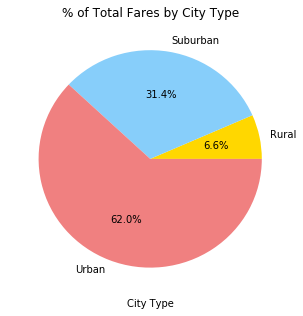

In [61]:
# Total Fares by city Type

fareByCityTypeDf = combineDataDf.groupby(['type'])['Total Fare Amt'].sum()


# Create a bar chart based off of the group series above
fareByCityPie = fareByCityTypeDf.plot(kind = 'pie',autopct='%1.1f%%',colors =colors,
                                      figsize=(5,5),title = '% of Total Fares by City Type')

# Set the xlabel and ylabel using class methods
fareByCityPie.set_xlabel("City Type")
fareByCityPie.set_ylabel("")


plt.show()